Esta libreta se ha realizado con el objetivo de realizar cálculos estadísticos para el TFG “SISTEMA PÚBLICO DE PENSIONES POR JUBILACIÓN EN ESPAÑA. SITUACIÓN ACTUAL Y SISTEMAS ALTERNATIVOS” realizado por el estudiante Jesús Tejedo López de Lerma.

El objetivo de esta libreta es comprobar la viabilidad del sistema público de pensiones español, en concreto las pensiones por jubilación, mediante cálculos sencillos con los datos obtenidos de distintas páginas.

En esta libreta no se pretende exponer ninguna explicación de los resultados, aunque se dejará un breve comentario de cada cálculo.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import statsmodels.api as sm

# Cargo todos los Dataset que utilizaré a continuación

In [2]:
df_1 = pd.read_csv('1_Cotizantes_Pensionistas_2002_2023.csv')
df_SS = pd.read_csv('5_Saldo_SS_Transpuesto_tratado.csv')
df_2 = pd.read_csv('2_emigracion_inmigracion_españa.csv')

# a) Ocupados vs Pensionistas

Naturaleza de los datos:

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Año                               23 non-null     int64  
 1   Cotizantes                        23 non-null     int64  
 2   Pensionistas_por_Jubilacion       23 non-null     int64  
 3   Pension_Media_Jubilacion_Mensual  23 non-null     float64
 4   Pensiones_Todas                   23 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 1.0 KB


***Explicación de las variables:***

    - Año: año en curso a mes de diciembre. Para el caso de 2001 los datos son de enero de 2002. Para 2023 los datos están actualizados a ocutubre.
    - Cotizantes: contribuyentes a la Seguridad Social.
    - Pensionista_por_Jubilacion: número de pensionistas en concepto de jubilación.
    - Pension_Media_Jubilacion_Mensual: pensión media al mes en ese período.
    - Pensiones_Todas: gasto en el total de pensiones (jubilación, viudedad, orfandad...)

In [4]:
df_1.head()

,Año,Cotizantes,Pensionistas_por_Jubilacion,Pension_Media_Jubilacion_Mensual,Pensiones_Todas
0,2001,15748752,4571096,550.0,6.143500e+10
1,2002,16188390,4593068,600.0,6.495800e+10
2,2003,16589561,4618176,630.0,6.939200e+10
3,2004,17161920,4628823,681.0,7.415600e+10
4,2005,18314382,4770504,688.0,7.922100e+10


***Nuevas columnas:***

    - Cotizantes_por_Pensionista: número de personas cotizando por pensionista por jubilación.
    - Gasto_Jubilacion_Anual_Total: Gasto en pensiones por jubilación al año.

In [5]:
# Creo columnas:
# Proporción de Cotizantes por pensionistas por jubilación
df_1['Cotizantes_por_Pensionistas'] = df_1['Cotizantes']/df_1['Pensionistas_por_Jubilacion']

# Pension_Meida_Anual_por_Jubilado:
Pension_Meida_Anual_por_Jubilado = df_1['Pension_Media_Jubilacion_Mensual'] * 12
# Pension_Meida_Anual:
df_1['Gasto_Jubilacion_Anual_Total'] = df_1['Pensionistas_por_Jubilacion'] * Pension_Meida_Anual_por_Jubilado

In [6]:
df_1.set_index('Año', inplace = True)

In [7]:
df_1.tail()

,Cotizantes,Pensionistas_por_Jubilacion,Pension_Media_Jubilacion_Mensual,Pensiones_Todas,Cotizantes_por_Pensionistas,Gasto_Jubilacion_Anual_Total
Año,,,,,,
2019,19966900,6089294,1143.55,1.448340e+11,3.279017,8.356095e+10
2020,19344400,6125792,1170.26,1.582120e+11,3.157861,8.602523e+10
2021,20184900,6218551,1196.17,1.632970e+11,3.245917,8.926133e+10
2022,20463900,6302297,1259.79,1.711650e+11,3.247054,9.527485e+10
2023,21265800,6401291,1376.40,1.906870e+11,3.322111,1.057288e+11


### Visualización en el tiempo de los cotizantes y pensionistas por jubilación
Visualización y proyección a 20 años de las columnas ***'Cotizantes' y 'Pensionistas_por_Jubilación'***

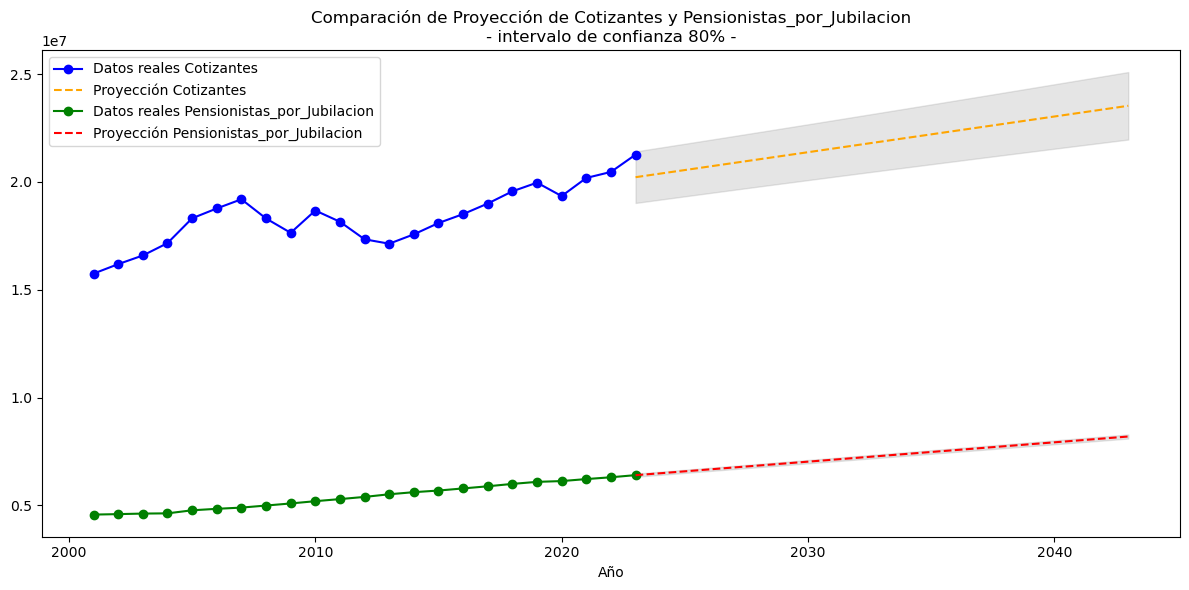

In [8]:
# Proyección de 20 años
anos_futuros = np.arange(2023, 2044)

# Ajusto el modelo de regresión lineal para "Cotizantes"
modelo_Cotizantes = LinearRegression().fit(df_1.index.values.reshape(-1, 1), df_1['Cotizantes'])

# Ajusto el modelo de regresión lineal para "Pensionistas_por_Jubilacion"
modelo_Pensionistas_por_Jubilacion = LinearRegression().fit(df_1.index.values.reshape(-1, 1), df_1['Pensionistas_por_Jubilacion'])

# Creo un DataFrame para los resultados de la proyección
resultados_proyeccion = pd.DataFrame({'Año': anos_futuros})

# Calculo las proyecciones
proyeccion_Cotizantes = modelo_Cotizantes.predict(anos_futuros.reshape(-1, 1))
proyeccion_Pensionistas_por_Jubilacion = modelo_Pensionistas_por_Jubilacion.predict(anos_futuros.reshape(-1, 1))

resultados_proyeccion['Cotizantes'] = proyeccion_Cotizantes
resultados_proyeccion['Pensionistas_por_Jubilacion'] = proyeccion_Pensionistas_por_Jubilacion
resultados_proyeccion.set_index('Año', inplace=True)

# Ajusto el modelo de regresión lineal con statsmodels para "Cotizantes"
X_Cotizantes = sm.add_constant(df_1.index.values)
y_Cotizantes = df_1['Cotizantes']
modelo_statsmodels_Cotizantes = sm.OLS(y_Cotizantes, X_Cotizantes).fit()

# Ajusto el modelo de regresión lineal con statsmodels para "Pensionistas_por_Jubilacion"
X_Pensionistas_por_Jubilacion = sm.add_constant(df_1.index.values)
y_Pensionistas_por_Jubilacion = df_1['Pensionistas_por_Jubilacion']
modelo_statsmodels_Pensionistas_por_Jubilacion = sm.OLS(y_Pensionistas_por_Jubilacion, X_Pensionistas_por_Jubilacion).fit()

# Calculo los intervalos de confianza al 80% para "Cotizantes"
predicciones_Cotizantes = modelo_statsmodels_Cotizantes.get_prediction(sm.add_constant(anos_futuros)).summary_frame(alpha=0.2)

# Calculo los intervalos de confianza al 80% para "Pensionistas_por_Jubilacion"
predicciones_Pensionistas_por_Jubilacion = modelo_statsmodels_Pensionistas_por_Jubilacion.get_prediction(sm.add_constant(anos_futuros)).summary_frame(alpha=0.2)

# Genero la gráfica
plt.figure(figsize=(12, 6))

# Líneas de datos reales y proyecciones para "Cotizantes"
plt.plot(df_1.index, df_1['Cotizantes'], label='Datos reales Cotizantes', marker='o', color='blue')
plt.plot(resultados_proyeccion.index, resultados_proyeccion['Cotizantes'], label='Proyección Cotizantes', linestyle= '--', color='orange')
plt.fill_between(resultados_proyeccion.index, predicciones_Cotizantes['obs_ci_lower'], predicciones_Cotizantes['obs_ci_upper'], alpha=0.2, color='gray')

# Líneas de datos reales y proyecciones para "Pensionistas_por_Jubilacion"
plt.plot(df_1.index, df_1['Pensionistas_por_Jubilacion'], label='Datos reales Pensionistas_por_Jubilacion', marker='o', color='green')
plt.plot(resultados_proyeccion.index, resultados_proyeccion['Pensionistas_por_Jubilacion'], label='Proyección Pensionistas_por_Jubilacion', linestyle= '--', color='red')
plt.fill_between(resultados_proyeccion.index, predicciones_Pensionistas_por_Jubilacion['obs_ci_lower'], predicciones_Pensionistas_por_Jubilacion['obs_ci_upper'], alpha=0.2, color='gray')

plt.xlabel('Año')
plt.title('''Comparación de Proyección de Cotizantes y Pensionistas_por_Jubilacion
- intervalo de confianza 80% -''')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# Ecuación de la recta para "Ocupados"
pendiente_Cotizantes = modelo_Cotizantes.coef_[0]
ordenada_al_origen_Cotizantes = modelo_Cotizantes.intercept_

# Ecuación de la recta para "Pensionistas"
pendiente_Pensionistas_por_Jubilacion = modelo_Pensionistas_por_Jubilacion.coef_[0]
ordenada_al_origen_Pensionistas_por_Jubilacion = modelo_Pensionistas_por_Jubilacion.intercept_

print(f'Ecuación de la recta para "Cotizantess": y = {pendiente_Cotizantes:.2f}x + {ordenada_al_origen_Cotizantes:.2f}')
print(f'Ecuación de la recta para "Pensionistas_por_Jubilacion": y = {pendiente_Pensionistas_por_Jubilacion:.2f}x + {ordenada_al_origen_Pensionistas_por_Jubilacion:.2f}')

Ecuación de la recta para "Cotizantess": y = 165562.16x + -314712054.47
Ecuación de la recta para "Pensionistas_por_Jubilacion": y = 89667.15x + -174998044.68


Nos encontramos con dos rectas con pendientes positivas. La pendiente de la variable ***'Cotizantes'*** es mayor que la de ***Pensionistas_por_Jubilación***. 

Esto indica que aumenta en mayor medida en el tiempo la cantidad de ***'Cotizantes'*** que la cantidad de ***'Pensionistas_por_Jubilación'***

### Visualización en el tiempo de la proporción cotizantes por jubilación
Visualización y proyección a 20 años de la columna ***Cotizantes_por_Pensionista***

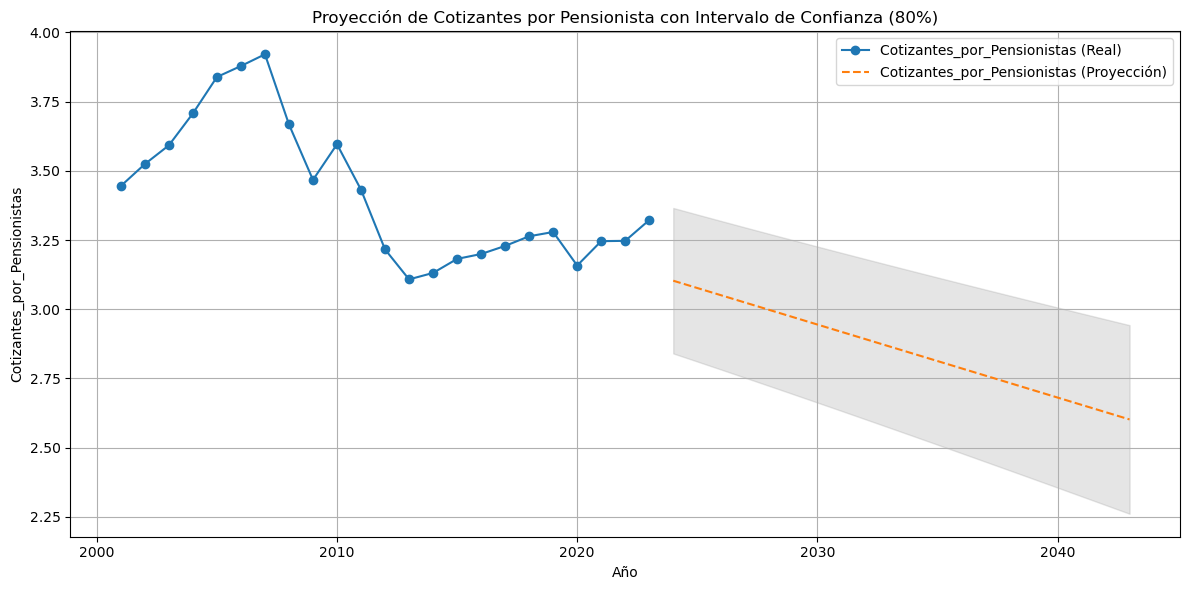

In [10]:
# Proyección de 20 años
anos_futuros = np.arange(2024, 2044)

# Ajusto el modelo de regresión lineal para "Cotizantes_por_Pensionistas"
modelo_Cotizantes_por_Pensionistas = LinearRegression().fit(df_1.index.values.reshape(-1, 1), df_1['Cotizantes_por_Pensionistas'])

# Preparo los datos para statsmodels
X_Cotizantes_por_Pensionistas = sm.add_constant(df_1.index.values)
y_Cotizantes_por_Pensionistas = df_1['Cotizantes_por_Pensionistas']

# Ajusto el modelo de regresión con statsmodels
modelo_statsmodels_Cotizantes_por_Pensionistas = sm.OLS(y_Cotizantes_por_Pensionistas, X_Cotizantes_por_Pensionistas).fit()

# Realizo la predicción para obtener los intervalos de confianza al 80% para "Cotizantes_por_Pensionistas"
predicciones_Cotizantes_por_Pensionistas = modelo_statsmodels_Cotizantes_por_Pensionistas.get_prediction(sm.add_constant(anos_futuros)).summary_frame(alpha=0.2)

# Creo un DataFrame para los resultados de la proyección
resultados_proyeccion = pd.DataFrame({
    'Año': anos_futuros,
    'Cotizantes_por_Pensionistas': predicciones_Cotizantes_por_Pensionistas['mean'],
    'Intervalo Inferior Cotizantes_por_Pensionistas': predicciones_Cotizantes_por_Pensionistas['obs_ci_lower'],
    'Intervalo Superior Cotizantes_por_Pensionistas': predicciones_Cotizantes_por_Pensionistas['obs_ci_upper']
})

# Genero la gráfica para los resultados con intervalo de confianza
plt.figure(figsize=(12, 6))

plt.plot(df_1.index, df_1['Cotizantes_por_Pensionistas'], label='Cotizantes_por_Pensionistas (Real)', marker='o')
plt.plot(resultados_proyeccion['Año'], resultados_proyeccion['Cotizantes_por_Pensionistas'], label='Cotizantes_por_Pensionistas (Proyección)', linestyle='--')
plt.fill_between(
    resultados_proyeccion['Año'],
    resultados_proyeccion['Intervalo Inferior Cotizantes_por_Pensionistas'],
    resultados_proyeccion['Intervalo Superior Cotizantes_por_Pensionistas'],
    alpha=0.2,
    color='gray'
)

plt.xlabel('Año')
plt.ylabel('Cotizantes_por_Pensionistas')
plt.title('Proyección de Cotizantes por Pensionista con Intervalo de Confianza (80%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
# Coeficientes del modelo de regresión lineal
pendiente = modelo_Cotizantes_por_Pensionistas.coef_[0]
intercepto = modelo_Cotizantes_por_Pensionistas.intercept_

# Ecuación de la recta
ecuacion_recta_sklearn = f'Cotizantes_por_Pensionistas = {pendiente:.2f}x + {intercepto:.2f}'
print(ecuacion_recta_sklearn)

Cotizantes_por_Pensionistas = -0.03x + 56.50


Comprobamos que por cada año que pasa disminuye el número de cotizantes por pensionista por jubilación en 0,03.

Tras esta comprobación de la evolución en la proporción del número de cotizantes a la Seguridad Social y el número de pensionistas por jubilación tenemos que aceptar que el número de cotizantes no crece tan rápido como para mantener la proporción de años anteriores.

### Visualización en el tiempo del gasto total por jubilación

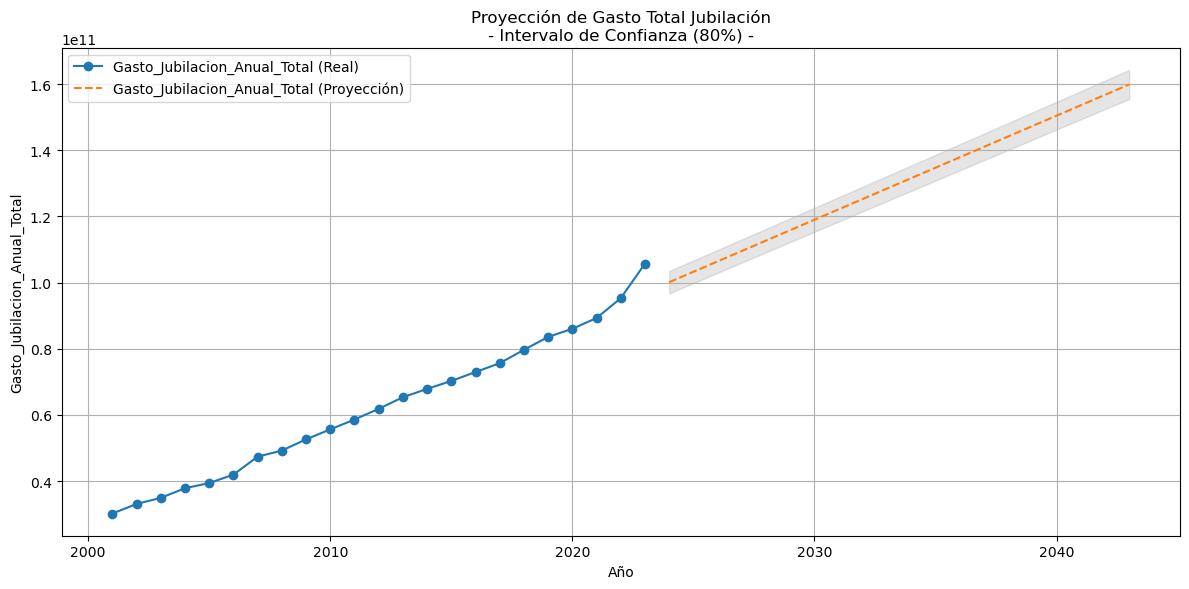

In [12]:
# Realizar una proyección de 20 años
anos_futuros = np.arange(2024, 2044)

# Ajustar el modelo de regresión lineal para "Gasto_Jubilacion_Anual_Total"
modelo_Gasto_Jubilacion_Anual_Total = LinearRegression().fit(df_1.index.values.reshape(-1, 1), df_1['Gasto_Jubilacion_Anual_Total'])

# Preparar los datos para statsmodels
X_Gasto_Jubilacion_Anual_Total = sm.add_constant(df_1.index.values)
y_Gasto_Jubilacion_Anual_Total = df_1['Gasto_Jubilacion_Anual_Total']

# Ajustar el modelo de regresión con statsmodels
modelo_statsmodels_Gasto_Jubilacion_Anual_Total = sm.OLS(y_Gasto_Jubilacion_Anual_Total, X_Gasto_Jubilacion_Anual_Total).fit()

# Realizar la predicción y obtener los intervalos de confianza al 80% para "Gasto_Jubilacion_Anual_Total"
predicciones_Gasto_Jubilacion_Anual_Total = modelo_statsmodels_Gasto_Jubilacion_Anual_Total.get_prediction(sm.add_constant(anos_futuros)).summary_frame(alpha=0.2)

# Crear un DataFrame para los resultados de la proyección
resultados_proyeccion = pd.DataFrame({
    'Año': anos_futuros,
    'Gasto_Jubilacion_Anual_Total': predicciones_Gasto_Jubilacion_Anual_Total['mean'],
    'Intervalo Inferior Gasto_Jubilacion_Anual_Total': predicciones_Gasto_Jubilacion_Anual_Total['obs_ci_lower'],
    'Intervalo Superior Gasto_Jubilacion_Anual_Total': predicciones_Gasto_Jubilacion_Anual_Total['obs_ci_upper']
})

# Graficar los resultados con intervalo de confianza
plt.figure(figsize=(12, 6))

plt.plot(df_1.index, df_1['Gasto_Jubilacion_Anual_Total'], label='Gasto_Jubilacion_Anual_Total (Real)', marker='o')
plt.plot(resultados_proyeccion['Año'], resultados_proyeccion['Gasto_Jubilacion_Anual_Total'], label='Gasto_Jubilacion_Anual_Total (Proyección)', linestyle='--')
plt.fill_between(
    resultados_proyeccion['Año'],
    resultados_proyeccion['Intervalo Inferior Gasto_Jubilacion_Anual_Total'],
    resultados_proyeccion['Intervalo Superior Gasto_Jubilacion_Anual_Total'],
    alpha=0.2,
    color='gray'
)

plt.xlabel('Año')
plt.ylabel('Gasto_Jubilacion_Anual_Total')
plt.title('''Proyección de Gasto Total Jubilación
- Intervalo de Confianza (80%) -''')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [13]:
# Coeficientes del modelo de regresión lineal
pendiente = modelo_Gasto_Jubilacion_Anual_Total.coef_[0]
intercepto = modelo_Gasto_Jubilacion_Anual_Total.intercept_

# Ecuación de la recta
ecuacion_recta_sklearn = f'Gasto_Jubilacion_Anual_Total = {pendiente:.2f}x + {intercepto:.2f}'
print(ecuacion_recta_sklearn)

Gasto_Jubilacion_Anual_Total = 3146261600.70x + -6267929871410.76


# b)Gasto Presupuesto en todas las Pensiones

In [14]:
df_1.tail()

,Cotizantes,Pensionistas_por_Jubilacion,Pension_Media_Jubilacion_Mensual,Pensiones_Todas,Cotizantes_por_Pensionistas,Gasto_Jubilacion_Anual_Total
Año,,,,,,
2019,19966900,6089294,1143.55,1.448340e+11,3.279017,8.356095e+10
2020,19344400,6125792,1170.26,1.582120e+11,3.157861,8.602523e+10
2021,20184900,6218551,1196.17,1.632970e+11,3.245917,8.926133e+10
2022,20463900,6302297,1259.79,1.711650e+11,3.247054,9.527485e+10
2023,21265800,6401291,1376.40,1.906870e+11,3.322111,1.057288e+11


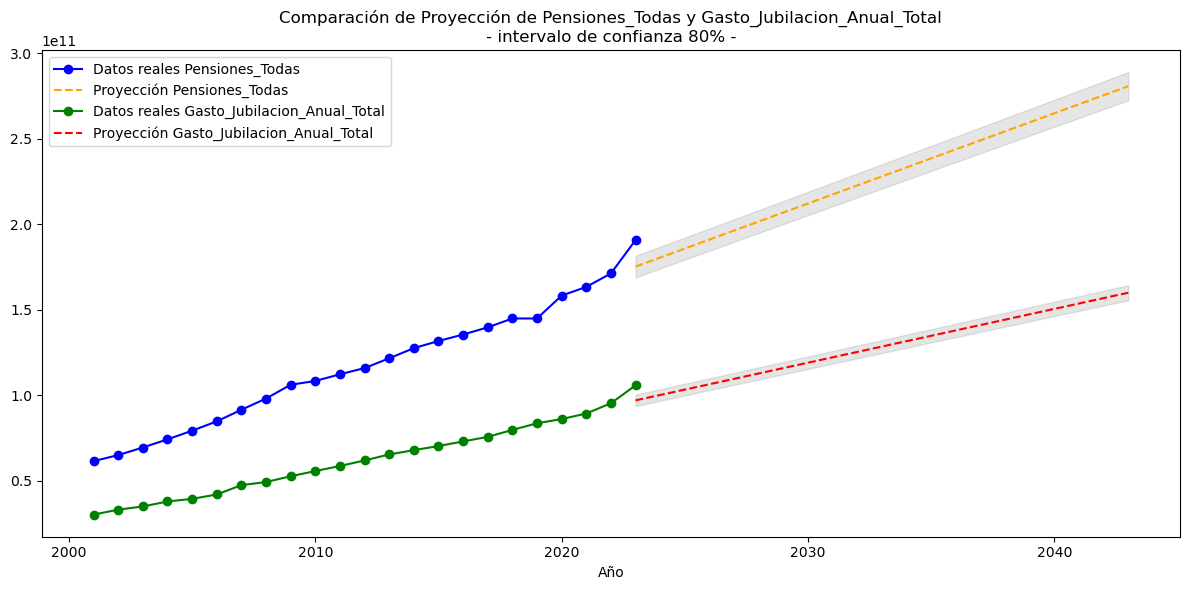

In [15]:
# Realizo una proyección de 20 años
anos_futuros = np.arange(2023, 2044)

# Ajusto el modelo de regresión lineal para "Pensiones_Todas"
modelo_Pensiones_Todas = LinearRegression().fit(df_1.index.values.reshape(-1, 1), df_1['Pensiones_Todas'])

# Ajusto el modelo de regresión lineal para "Gasto_Jubilacion_Anual_Total"
modelo_Gasto_Jubilacion_Anual_Total = LinearRegression().fit(df_1.index.values.reshape(-1, 1), df_1['Gasto_Jubilacion_Anual_Total'])

# Creo un DataFrame para los resultados de la proyección
resultados_proyeccion = pd.DataFrame({'Ano': anos_futuros})

# Calculo las proyecciones
proyeccion_Pensiones_Todas = modelo_Pensiones_Todas.predict(anos_futuros.reshape(-1, 1))
proyeccion_Gasto_Jubilacion_Anual_Total = modelo_Gasto_Jubilacion_Anual_Total.predict(anos_futuros.reshape(-1, 1))

resultados_proyeccion['Pensiones_Todas'] = proyeccion_Pensiones_Todas
resultados_proyeccion['Gasto_Jubilacion_Anual_Total'] = proyeccion_Gasto_Jubilacion_Anual_Total
resultados_proyeccion.set_index('Ano', inplace=True)

# Ajusto el modelo de regresión lineal con statsmodels para "Pensiones_Todas"
X_Pensiones_Todas = sm.add_constant(df_1.index.values)
y_Pensiones_Todas = df_1['Pensiones_Todas']
modelo_statsmodels_Pensiones_Todas = sm.OLS(y_Pensiones_Todas, X_Pensiones_Todas).fit()

# Ajusto el modelo de regresión lineal con statsmodels para "Gasto_Jubilacion_Anual_Total"
X_Gasto_Jubilacion_Anual_Total = sm.add_constant(df_1.index.values)
y_Gasto_Jubilacion_Anual_Total = df_1['Gasto_Jubilacion_Anual_Total']
modelo_statsmodels_Gasto_Jubilacion_Anual_Total = sm.OLS(y_Gasto_Jubilacion_Anual_Total, X_Gasto_Jubilacion_Anual_Total).fit()

# Calculo los intervalos de confianza al 80% para "Pensiones_Todas"
predicciones_Pensiones_Todas = modelo_statsmodels_Pensiones_Todas.get_prediction(sm.add_constant(anos_futuros)).summary_frame(alpha=0.2)

# Calculo los intervalos de confianza al 80% para "Gasto_Jubilacion_Anual_Total"
predicciones_Gasto_Jubilacion_Anual_Total = modelo_statsmodels_Gasto_Jubilacion_Anual_Total.get_prediction(sm.add_constant(anos_futuros)).summary_frame(alpha=0.2)

# Genero gráficas para los resultados en una sola gráfica
plt.figure(figsize=(12, 6))

# Líneas de datos reales y proyecciones para "Pensiones_Todas"
plt.plot(df_1.index, df_1['Pensiones_Todas'], label='Datos reales Pensiones_Todas', marker='o', color='blue')
plt.plot(resultados_proyeccion.index, resultados_proyeccion['Pensiones_Todas'], label='Proyección Pensiones_Todas', linestyle= '--', color='orange')
plt.fill_between(resultados_proyeccion.index, predicciones_Pensiones_Todas['obs_ci_lower'], predicciones_Pensiones_Todas['obs_ci_upper'], alpha=0.2, color='gray')

# Líneas de datos reales y proyecciones para "Gasto_Jubilacion_Anual_Total"
plt.plot(df_1.index, df_1['Gasto_Jubilacion_Anual_Total'], label='Datos reales Gasto_Jubilacion_Anual_Total', marker='o', color='green')
plt.plot(resultados_proyeccion.index, resultados_proyeccion['Gasto_Jubilacion_Anual_Total'], label='Proyección Gasto_Jubilacion_Anual_Total', linestyle= '--', color='red')
plt.fill_between(resultados_proyeccion.index, predicciones_Gasto_Jubilacion_Anual_Total['obs_ci_lower'], predicciones_Gasto_Jubilacion_Anual_Total['obs_ci_upper'], alpha=0.2, color='gray')

plt.xlabel('Año')
plt.title('''Comparación de Proyección de Pensiones_Todas y Gasto_Jubilacion_Anual_Total
- intervalo de confianza 80% -''')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# Coeficientes del modelo de regresión lineal para "Pensiones_Todas"
pendiente_Pensiones_Todas = modelo_Pensiones_Todas.coef_[0]
ordenada_al_origen_Pensiones_Todas = modelo_Pensiones_Todas.intercept_

# Coeficientes del modelo de regresión lineal para "Gasto_Jubilacion_Anual_Total"
pendiente_Gasto_Jubilacion_Anual_Total = modelo_Gasto_Jubilacion_Anual_Total.coef_[0]
ordenada_al_origen_Gasto_Jubilacion_Anual_Total = modelo_Gasto_Jubilacion_Anual_Total.intercept_

# Ecuaciones de la recta
ecuacion_Pensiones_Todas = f'Ecuación de la recta para "Pensiones_Todas": y = {pendiente_Pensiones_Todas:.2f}x + {ordenada_al_origen_Pensiones_Todas:.2f}'
ecuacion_Gasto_Jubilacion_Anual_Total = f'Ecuación de la recta para "Gasto_Jubilacion_Anual_Total": y = {pendiente_Gasto_Jubilacion_Anual_Total:.2f}x + {ordenada_al_origen_Gasto_Jubilacion_Anual_Total:.2f}'

print(ecuacion_Pensiones_Todas)
print(ecuacion_Gasto_Jubilacion_Anual_Total)

Ecuación de la recta para "Pensiones_Todas": y = 5273473201.58x + -10493073178102.76
Ecuación de la recta para "Gasto_Jubilacion_Anual_Total": y = 3146261600.70x + -6267929871410.76


# c) SaldoSeguridad Social

In [17]:
df_SS.head()

,Años,Cotizaciones_sociales,Tasas_y_otros_ingresos,Transferencias_corrientes,Ingresos_patrimoniales,_Operaciones_corrientes,Enajenación_de_inversiones_reales,Transferencias_de_capital,_Operaciones_de_capital,Operaciones_no_financieras,Activos_financieros,Pasivos_financieros,_Operaciones_financieras,INGRESOS_TOTALES,PRESTACIONES_ECONÓMICAS,ASISTENCIA_SANITARIA,SERVICIOS_SOCIALES,TESORERÍA_INFORMÁTICA_Y_OTROS_SERVICIOS_FUNCIONALES_COMUNES,GASTOS_TOTALES
0,1995,41951196,1141174,19222269,137875,62452514,7592,283026,290617,62743132,135475,2670561.0,2806036,65549168,42973084,20442597,1529173,1017317,65962171
1,1996,45155360,1704232,20755337,100247,67715177,1020,215651,216671,67931848,295671,2673693.0,2969364,70901212,46615772,21759287,1468354,1152024,70995436
2,1997,48012060,1770656,22200626,110909,72094249,15284,194884,210168,72304417,363378,3038791.0,3402168,75706585,48820390,22194576,1480443,1193784,73689193
3,1998,51146039,1666083,24177756,147547,77137426,53760,276033,329793,77467218,255602,2857470.0,3113072,80580290,51114707,24156228,1568016,1213925,78052877
4,1999,54904942,1344750,26136562,137876,82524129,25994,461119,487113,83011243,209926,531595.0,741521,83752764,53537715,25631371,1604298,1464622,82238006


In [18]:
df_SS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 19 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Años                                                         29 non-null     int64  
 1   Cotizaciones_sociales                                        29 non-null     int64  
 2   Tasas_y_otros_ingresos                                       29 non-null     int64  
 3   Transferencias_corrientes                                    29 non-null     int64  
 4   Ingresos_patrimoniales                                       29 non-null     int64  
 5   _Operaciones_corrientes                                      29 non-null     int64  
 6   Enajenación_de_inversiones_reales                            29 non-null     int64  
 7   Transferencias_de_capital                                    29 non-null     int64

In [19]:
# Compruebo los valores faltantes
df_SS.isna().sum()

Años                                                           0
Cotizaciones_sociales                                          0
Tasas_y_otros_ingresos                                         0
Transferencias_corrientes                                      0
Ingresos_patrimoniales                                         0
_Operaciones_corrientes                                        0
Enajenación_de_inversiones_reales                              0
Transferencias_de_capital                                      0
_Operaciones_de_capital                                        0
Operaciones_no_financieras                                     0
Activos_financieros                                            0
Pasivos_financieros                                            1
_Operaciones_financieras                                       0
INGRESOS_TOTALES                                               0
PRESTACIONES_ECONÓMICAS                                        0
ASISTENCIA_SANITARIA     

In [20]:
# Busco filas con NaN en el DataFrame df_SS
filas_con_nan = df_SS[df_SS.isna().any(axis=1)]

print(filas_con_nan)

    Años  Cotizaciones_sociales  Tasas_y_otros_ingresos  \
18  2013               98210296                 1390598   

    Transferencias_corrientes  Ingresos_patrimoniales  \
18                   15733288                 2821061   

    _Operaciones_corrientes  Enajenación_de_inversiones_reales  \
18                118155243                               1364   

    Transferencias_de_capital  _Operaciones_de_capital  \
18                      28785                    30149   

    Operaciones_no_financieras  Activos_financieros  Pasivos_financieros  \
18                   118185393              9322210                  NaN   

    _Operaciones_financieras  INGRESOS_TOTALES  PRESTACIONES_ECONÓMICAS  \
18                   9322210         127507603                121267052   

    ASISTENCIA_SANITARIA  SERVICIOS_SOCIALES  \
18               1384093             2541896   

    TESORERÍA_INFORMÁTICA_Y_OTROS_SERVICIOS_FUNCIONALES_COMUNES  \
18                                            27

In [21]:
# Relleno los NaN con 0 en el DataFrame df_SS
df_SS = df_SS.fillna(0)

In [22]:
df_SS['Cotizaciones_Transferencias'] = df_SS['Cotizaciones_sociales'] + df_SS['Transferencias_corrientes']

In [23]:
df_SS['Deficit'] = df_SS['Cotizaciones_sociales'] - df_SS['PRESTACIONES_ECONÓMICAS']

In [24]:
df_SS.head()

,Años,Cotizaciones_sociales,Tasas_y_otros_ingresos,Transferencias_corrientes,Ingresos_patrimoniales,_Operaciones_corrientes,Enajenación_de_inversiones_reales,Transferencias_de_capital,_Operaciones_de_capital,Operaciones_no_financieras,...,Pasivos_financieros,_Operaciones_financieras,INGRESOS_TOTALES,PRESTACIONES_ECONÓMICAS,ASISTENCIA_SANITARIA,SERVICIOS_SOCIALES,TESORERÍA_INFORMÁTICA_Y_OTROS_SERVICIOS_FUNCIONALES_COMUNES,GASTOS_TOTALES,Cotizaciones_Transferencias,Deficit
0,1995,41951196,1141174,19222269,137875,62452514,7592,283026,290617,62743132,...,2670561.0,2806036,65549168,42973084,20442597,1529173,1017317,65962171,61173465,-1021888
1,1996,45155360,1704232,20755337,100247,67715177,1020,215651,216671,67931848,...,2673693.0,2969364,70901212,46615772,21759287,1468354,1152024,70995436,65910697,-1460412
2,1997,48012060,1770656,22200626,110909,72094249,15284,194884,210168,72304417,...,3038791.0,3402168,75706585,48820390,22194576,1480443,1193784,73689193,70212686,-808330
3,1998,51146039,1666083,24177756,147547,77137426,53760,276033,329793,77467218,...,2857470.0,3113072,80580290,51114707,24156228,1568016,1213925,78052877,75323795,31332
4,1999,54904942,1344750,26136562,137876,82524129,25994,461119,487113,83011243,...,531595.0,741521,83752764,53537715,25631371,1604298,1464622,82238006,81041504,1367227


In [25]:
df_SS.columns

Index(['Años', 'Cotizaciones_sociales', 'Tasas_y_otros_ingresos',
       'Transferencias_corrientes', 'Ingresos_patrimoniales',
       '_Operaciones_corrientes', 'Enajenación_de_inversiones_reales',
       'Transferencias_de_capital', '_Operaciones_de_capital',
       'Operaciones_no_financieras', 'Activos_financieros',
       'Pasivos_financieros', '_Operaciones_financieras', 'INGRESOS_TOTALES',
       'PRESTACIONES_ECONÓMICAS', 'ASISTENCIA_SANITARIA', 'SERVICIOS_SOCIALES',
       'TESORERÍA_INFORMÁTICA_Y_OTROS_SERVICIOS_FUNCIONALES_COMUNES',
       'GASTOS_TOTALES', 'Cotizaciones_Transferencias', 'Deficit'],
      dtype='object')

***Las prestaciones económicas deberían financiarse con las cotizaciones sociales***

***En los presupuestos se muestra como se utilizan las transferencias corrientes para cubrir la diferencia que se crea entre las cotizaciones ylas prestaciones***

In [26]:
# Seleeciono las columnas necesarias para los cálculos y genero un DataFrame
df_SS_filtrado = df_SS[['Años', 'Cotizaciones_sociales', 'Transferencias_corrientes', 'PRESTACIONES_ECONÓMICAS', 'Deficit']]

In [27]:
df_SS_filtrado.head()

,Años,Cotizaciones_sociales,Transferencias_corrientes,PRESTACIONES_ECONÓMICAS,Deficit
0,1995,41951196,19222269,42973084,-1021888
1,1996,45155360,20755337,46615772,-1460412
2,1997,48012060,22200626,48820390,-808330
3,1998,51146039,24177756,51114707,31332
4,1999,54904942,26136562,53537715,1367227


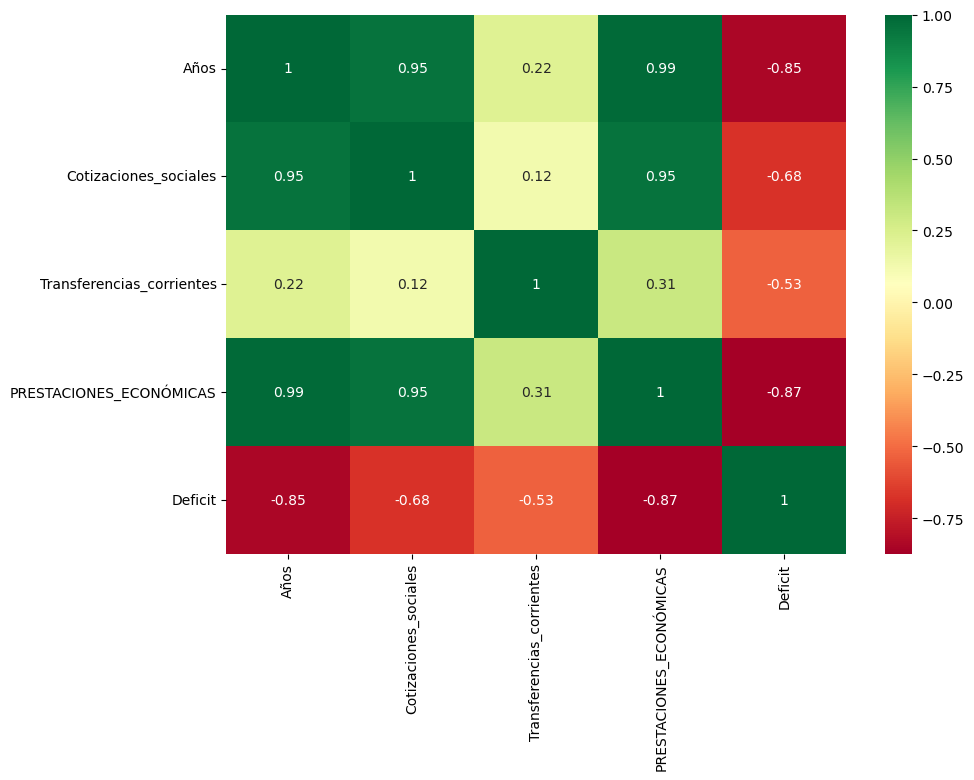

In [28]:
# Genero una matriz de correlación
corr_matrix_SS = df_SS_filtrado.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix_SS, annot=True, cmap="RdYlGn")
plt.show()

Observaciones correlación déficit creado entre prestaciones y cotizaciones:
    
    - Fuerte correlación negativa el déficit y el transcurso de los años. Un aumento de los años hace que aumente la deuda del déficit.
    - Correlación negativa con transferencias corrientes. Supone que aumentar las transferencias aumenta la deuda del déficit.
    - Fuerte correlación negativa con las prestaciones económicas. Aumentar las prestaciones económicasa (pensiones) aumenta la deuda del déficit.

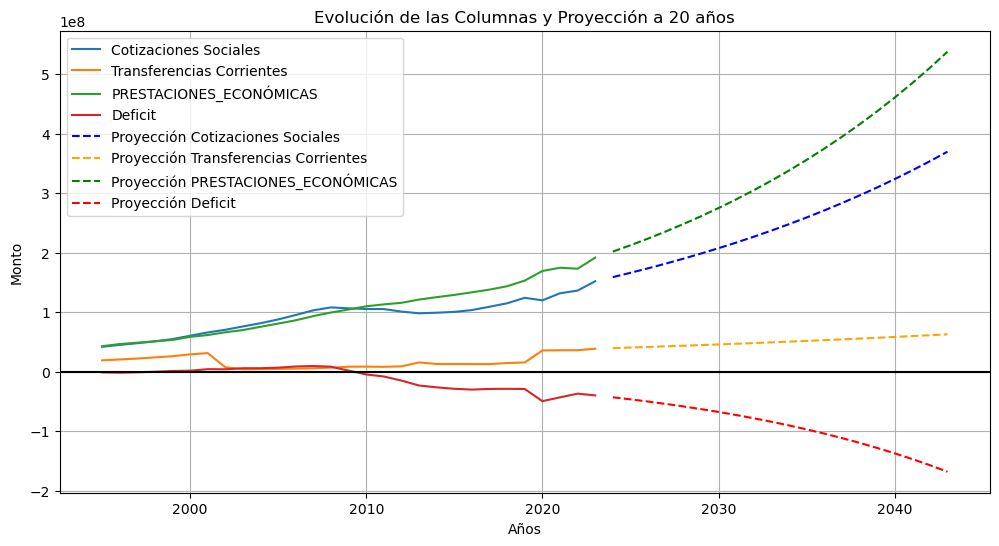

In [29]:
# Calcular tasas de crecimiento promedio
cotizaciones_crecimiento = (df_SS_filtrado['Cotizaciones_sociales'].iloc[-1] / df_SS_filtrado['Cotizaciones_sociales'].iloc[0]) ** (1 / len(df_SS_filtrado)) - 1
transferencias_crecimiento = (df_SS_filtrado['Transferencias_corrientes'].iloc[-1] / df_SS_filtrado['Transferencias_corrientes'].iloc[0]) ** (1 / len(df_SS_filtrado)) - 1
prestaciones_crecimiento = (df_SS_filtrado['PRESTACIONES_ECONÓMICAS'].iloc[-1] / df_SS_filtrado['PRESTACIONES_ECONÓMICAS'].iloc[0]) ** (1 / len(df_SS_filtrado)) - 1

# Proyectar a 20 años
proyeccion_anios = list(range(2024, 2044))
proyeccion_cotizaciones = [df_SS_filtrado['Cotizaciones_sociales'].iloc[-1] * (1 + cotizaciones_crecimiento) ** (i - df_SS_filtrado['Años'].iloc[-1]) for i in proyeccion_anios]
proyeccion_transferencias = [df_SS_filtrado['Transferencias_corrientes'].iloc[-1] * (1 + transferencias_crecimiento) ** (i - df_SS_filtrado['Años'].iloc[-1]) for i in proyeccion_anios]
proyeccion_prestaciones = [df_SS_filtrado['PRESTACIONES_ECONÓMICAS'].iloc[-1] * (1 + prestaciones_crecimiento) ** (i - df_SS_filtrado['Años'].iloc[-1]) for i in proyeccion_anios]
proyeccion_deficit = [proyeccion_cotizaciones[i - 2024] - proyeccion_prestaciones[i - 2024] for i in proyeccion_anios]

# Crear la gráfica
plt.figure(figsize=(12, 6))

# Graficar las columnas
plt.plot(df_SS_filtrado['Años'], df_SS_filtrado['Cotizaciones_sociales'], label='Cotizaciones Sociales')
plt.plot(df_SS_filtrado['Años'], df_SS_filtrado['Transferencias_corrientes'], label='Transferencias Corrientes')
plt.plot(df_SS_filtrado['Años'], df_SS_filtrado['PRESTACIONES_ECONÓMICAS'], label='PRESTACIONES_ECONÓMICAS')
plt.plot(df_SS_filtrado['Años'], df_SS_filtrado['Deficit'], label='Deficit')

# Graficar la proyección
plt.plot(proyeccion_anios, proyeccion_cotizaciones, linestyle='--', color='blue', label='Proyección Cotizaciones Sociales')
plt.plot(proyeccion_anios, proyeccion_transferencias, linestyle='--', color='orange', label='Proyección Transferencias Corrientes')
plt.plot(proyeccion_anios, proyeccion_prestaciones, linestyle='--', color='green', label='Proyección PRESTACIONES_ECONÓMICAS')
plt.plot(proyeccion_anios, proyeccion_deficit, linestyle='--', color='red', label='Proyección Deficit')

# Agregar una línea horizontal en el eje Y con valor 0
plt.axhline(y=0, color='black', linestyle='-')

# Personalizar la gráfica
plt.xlabel('Años')
plt.ylabel('Monto')
plt.title('Evolución de las Columnas y Proyección a 20 años')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

# d) Relevancia de la inmigración en el sistema de la Seguridad Social

In [30]:
# defino la columna Año como índice:
df_2.set_index('Año', inplace = True)

In [31]:
df_2.head()

,Emigración,Inmigración,Cotizantes
Año,,,
2008,153782,269302,18305613
2009,195978,187872,17640018
2010,206347,186990,18674900
2011,208400,194527,18153000
2012,234148,150849,17339600


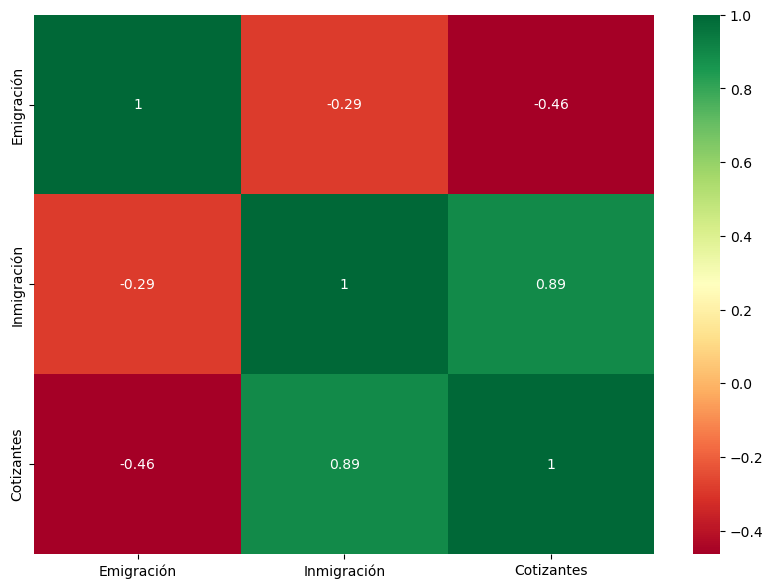

In [32]:
# Genero una matriz de correlación
corr_matrix_2 = df_2.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix_2, annot=True, cmap="RdYlGn")
plt.show()

Se puede observar que la correlación entre la emigración y los cotizantes no es significante. Esto es debido a la gran correlación que existe entre la inmigración y el número de cotizantes.

Se puede argumentar que un aumento de la inmigración (legal) aumenta el número de cotizantes en el sistema.